In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [542]:
# Importing the dataset, displaying its shape and columns
Building = "Building_Energy_Benchmarking.csv"
Building_Energy = pd.read_csv(Building)
display(Building_Energy.info())
display(Building_Energy.shape)
display(Building_Energy.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 31 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Property Id                                                            494 non-null    int64  
 1   Property Name                                                          494 non-null    object 
 2   Address 1                                                              494 non-null    object 
 3   City                                                                   494 non-null    object 
 4   Postal Code                                                            494 non-null    object 
 5   Province                                                               494 non-null    object 
 6   Primary Property Type - Self Selected                                  494 non-null    obj

None

(494, 31)

,Property Id,Number of Buildings,Year Built,ENERGY STAR Score,Site EUI (GJ/m²),Weather Normalized Site EUI (GJ/m²),Source EUI (GJ/m²),Weather Normalized Source EUI (GJ/m²),Total GHG Emissions Intensity (kgCO2e/m²),Direct GHG Emissions Intensity (kgCO2e/m²),Electricity Use – Generated from Onsite Renewable Systems (kWh),Green Power - Onsite and Offsite (kWh),Avoided Emissions - Onsite and Offsite Green Power (Metric Tons CO2e),Year Ending
count,4.940000e+02,494.000000,494.000000,165.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,44.000000,2.960000e+02,296.000000,494.000000
mean,1.308877e+07,1.060729,1980.091093,44.836364,1.774798,1.810324,2.282753,2.319717,158.671660,63.821862,77834.334091,5.997183e+05,278.847635,2020.995951
std,5.659556e+06,0.278281,25.159568,30.244187,1.306700,1.331529,1.597846,1.622897,109.472637,56.835735,119836.895927,1.196070e+06,556.048804,1.414208
min,6.169481e+06,1.000000,1896.000000,1.000000,0.060000,0.060000,0.110000,0.110000,10.200000,0.000000,541.000000,1.040400e+03,0.500000,2019.000000
25%,9.563763e+06,1.000000,1970.000000,17.000000,0.990000,1.000000,1.312500,1.350000,93.100000,33.325000,1910.675000,1.030868e+05,48.000000,2020.000000
50%,9.997794e+06,1.000000,1978.000000,46.000000,1.290000,1.310000,1.680000,1.690000,117.600000,43.900000,22326.200000,2.203235e+05,102.500000,2021.000000
75%,2.198860e+07,1.000000,1996.000000,76.000000,2.065000,2.110000,2.622500,2.652500,186.975000,74.050000,133176.750000,5.415978e+05,252.000000,2022.000000
max,2.198863e+07,3.000000,2018.000000,94.000000,8.430000,8.360000,10.130000,10.060000,666.200000,386.000000,447362.900000,9.618604e+06,4472.000000,2023.000000


In [9]:
# Identifying and listing the number of missing values in each column
missing_values = Building_Energy.isnull().sum()
print("Columns with missing values:", missing_values)

Columns with missing values: Property Id                                                                0
Property Name                                                              0
Address 1                                                                  0
City                                                                       0
Postal Code                                                                0
Province                                                                   0
Primary Property Type - Self Selected                                      0
Number of Buildings                                                        0
Year Built                                                                 0
Property GFA - Self-Reported (m²)                                          0
ENERGY STAR Score                                                        329
Site Energy Use (GJ)                                                       0
Weather Normalized Site Energy Use (GJ)        

In [544]:
#Columns with more than 40 percent missing values
missing_percentage = missing_values / len(Building_Energy) * 100
print("Missing Percentage:\n", missing_percentage)
# From the output, columns with more than 60% missing values are:
#Energy star score, District Hot water use, Electricity use, Green Power, Avoided Emissions

Missing Percentage:
 Property Id                                                               0.000000
Property Name                                                             0.000000
Address 1                                                                 0.000000
City                                                                      0.000000
Postal Code                                                               0.000000
Province                                                                  0.000000
Primary Property Type - Self Selected                                     0.000000
Number of Buildings                                                       0.000000
Year Built                                                                0.000000
Property GFA - Self-Reported (m²)                                         0.000000
ENERGY STAR Score                                                        66.599190
Site Energy Use (GJ)                                              

In [546]:
# Dropping columns with more than 40% missing values using by keeping columns with at least 60% non-missing values.
threshold = len(Building_Energy) * 0.6
cleaned_Building_E = Building_Energy.dropna(axis=1, thresh=threshold)
print("Dropping columns with more than 40% missing values:\n", cleaned_Building_E)

Dropping columns with more than 40% missing values:
      Property Id                    Property Name                  Address 1  \
0       10176804  Acadia Aquatic & Fitness Centre       9009 Fairmount Dr SE   
1        6169481                       Ad Valorem              2924 11 ST NE   
2        6305956             Alberta Trade Centre               315 10 AV SE   
3        8854296                   Andrew Davison                133 6 AV SE   
4       21988603           Animal Services Centre        2201 PORTLAND ST SE   
..           ...                              ...                        ...   
489     21988624                  Senior Services               311 34 AV SE   
490     21988625                 Fire Station #25              4705 76 AV SE   
491     21988627                           EMS #6       1940 WESTMOUNT BV NW   
492     21988628                 Fire Station #24             2607 106 AV SW   
493     21988629                 Fire Station #36  10071 HIDDEN VAL

In [548]:
# Showing numerical columns and categorical columns
display(cleaned_Building_E.dtypes.value_counts())

object     16
float64     6
int64       4
Name: count, dtype: int64

In [550]:
# Filling categorical columns with mode and numerical column with mode
filled_val = {}
for col in cleaned_Building_E.columns:
    if cleaned_Building_E[col].dtype == 'object': #this a categorical column
        filled_val[col] = cleaned_Building_E[col].mode()[0] 
    else: # This is a numerical column
        filled_val[col] = cleaned_Building_E[col].median()

# Fill missing values
cleaned_Building_Efilled = cleaned_Building_E.fillna(filled_val)
print(cleaned_Building_Efilled)

     Property Id                    Property Name                  Address 1  \
0       10176804  Acadia Aquatic & Fitness Centre       9009 Fairmount Dr SE   
1        6169481                       Ad Valorem              2924 11 ST NE   
2        6305956             Alberta Trade Centre               315 10 AV SE   
3        8854296                   Andrew Davison                133 6 AV SE   
4       21988603           Animal Services Centre        2201 PORTLAND ST SE   
..           ...                              ...                        ...   
489     21988624                  Senior Services               311 34 AV SE   
490     21988625                 Fire Station #25              4705 76 AV SE   
491     21988627                           EMS #6       1940 WESTMOUNT BV NW   
492     21988628                 Fire Station #24             2607 106 AV SW   
493     21988629                 Fire Station #36  10071 HIDDEN VALLEY DR NW   

        City Postal Code Province Prima

In [552]:
# Identifying numerical values in text-based numeric columns
import re
search_result = []
for col in cleaned_Building_Efilled.columns:
    if cleaned_Building_Efilled[col].dtype == 'object': # Check if the column is categorical
        for value in cleaned_Building_Efilled[col]: #Loop through the column values
            if re.search(r'\d', str(value)): # Checks if the column value contains a digit
                search_result.append(col) # Stores the column name
                break 
print("Text based numeric column:", search_result)

Text based numeric column: ['Property Name', 'Address 1', 'Postal Code', 'Property GFA - Self-Reported (m²)', 'Site Energy Use (GJ)', 'Weather Normalized Site Energy Use (GJ)', 'Source Energy Use (GJ)', 'Weather Normalized Source Energy Use (GJ)', 'Total GHG Emissions (Metric Tons CO2e)', 'Direct GHG Emissions (Metric Tons CO2e)', 'Electricity Use - Grid Purchase (kWh)', 'Natural Gas Use (GJ)', 'Unique ID']


In [554]:
# Using Regex to extract numerical values from text-based numeric columns
ext_values = {}
for col in search_result:
    ext_values[col] = [] # Initialize an empty list for each column
# Extract numerical values
    for value in cleaned_Building_Efilled[col]:
        num = re.findall(r'\d+', str(value))
        if num:
            ext_values[col].append(''.join(num))
        else:
            ext_values[col].append(None)
extracted_df = pd.DataFrame(ext_values)

print("Extracted numeric values:", extracted_df)

Extracted numeric values:     Property Name Address 1 Postal Code Property GFA - Self-Reported (m²)  \
0            None      9009         204                              1838   
1            None    292411         277                              7770   
2            None     31510         202                              6681   
3            None      1336         202                             17468   
4            None      2201         247                              2143   
..            ...       ...         ...                               ...   
489          None     31134         217                               768   
490            25    470576         221                              1108   
491             6      1940         238                               425   
492            24   2607106         247                              1108   
493            36     10071         351                               204   

    Site Energy Use (GJ) Weather Normalized Site 

In [556]:
# Standardizing the postal code
def standardize_postal_code(postal_code):
    clean_postal = re.sub(r'[^A-Za-z0-9]', '', postal_code)
    clean_postal = clean_postal.upper() # covert to upper case
    if len(clean_postal) == 6:
        return clean_postal[:3] + ' ' + clean_postal[3:] # Formatting the clean postal code to the correct pattern A1A A1A
    else:
        return None

# Applying the function to the postal_code column
cleaned_Building_Efilled['StandardizedPostal'] = cleaned_Building_Efilled['Postal Code'].apply(standardize_postal_code)
print(cleaned_Building_Efilled[['Postal Code', 'StandardizedPostal']])

    Postal Code StandardizedPostal
0       T2H 0Z4            T2H 0Z4
1        t2e7l7            T2E 7L7
2       T2G 0W2            T2G 0W2
3        T2G0G2            T2G 0G2
4       T2G 4M7            T2G 4M7
..          ...                ...
489     T2G 1T7            T2G 1T7
490     T2C 2X1            T2C 2X1
491     T2N 3G8            T2N 3G8
492     T2W 4H7            T2W 4H7
493     T3A 5G1            T3A 5G1

[494 rows x 2 columns]


In [558]:
# function for text meaningful clean addresses
def meaningful_address(address):
    address= re.sub(r'[^A-Za-z0-9\s]', '', address)
    address= re.sub(r'\bSt\b', 'Street', address, flags = re.IGNORECASE) #Replacing common abbreviations
    address= re.sub(r'\bAve\b', 'Avenue', address)
    address= re.sub(r'\bAV\b', 'Avenue', address, flags = re.IGNORECASE)
    address= re.sub(r'\bRD\b', 'Road', address, flags = re.IGNORECASE )
    address= re.sub(r'\bTR\b', 'Trail', address, flags = re.IGNORECASE)
    address= re.sub(r'\bWY\b', 'Way', address)
    address= re.sub(r'\bBV\b', 'Boulevard', address)
    address= re.sub(r'\bBlvd\b', 'Boulevard', address)
    address= re.sub(r'\bDR\b', 'Drive', address, flags = re.IGNORECASE)
    address= re.sub(r'\bGA\b', 'Gate', address, flags = re.IGNORECASE)
    address = address.strip()
    return address

# function for text meaningful property name
def meaningful_prop_name(name):
    name = re.sub(r'[^A-Za-z0-9 &]', '', name)
    name = re.sub('&', 'and', name)
    name = re.sub(r'#', '', name)
    name = name.strip()
    return name

# Applying the functions above to the data
cleaned_Building_Efilled['Clean Address'] = cleaned_Building_Efilled['Address 1'].apply(meaningful_address)
cleaned_Building_Efilled['Clean Property Name'] = cleaned_Building_Efilled['Property Name'].apply(meaningful_prop_name)
print(cleaned_Building_Efilled[['Clean Address', 'Clean Property Name']])

                    Clean Address                Clean Property Name
0         9009 Fairmount Drive SE  Acadia Aquatic and Fitness Centre
1               2924 11 Street NE                         Ad Valorem
2                315 10 Avenue SE               Alberta Trade Centre
3                 133 6 Avenue SE                     Andrew Davison
4         2201 PORTLAND Street SE             Animal Services Centre
..                            ...                                ...
489              311 34 Avenue SE                    Senior Services
490             4705 76 Avenue SE                    Fire Station 25
491   1940 WESTMOUNT Boulevard NW                              EMS 6
492            2607 106 Avenue SW                    Fire Station 24
493  10071 HIDDEN VALLEY Drive NW                    Fire Station 36

[494 rows x 2 columns]


In [560]:
# Extracted values are converted to numerical types
for col in extracted_df.columns:
    # Covert to numerical, errors='coerce' is for any value that cannot be converted to a valid number be replaced with NaN
    extracted_df[col] = pd.to_numeric(extracted_df[col], errors='coerce') 

print("Converted extracted values:", extracted_df)

Converted extracted values:      Property Name  Address 1  Postal Code  Property GFA - Self-Reported (m²)  \
0              NaN       9009          204                               1838   
1              NaN     292411          277                               7770   
2              NaN      31510          202                               6681   
3              NaN       1336          202                              17468   
4              NaN       2201          247                               2143   
..             ...        ...          ...                                ...   
489            NaN      31134          217                                768   
490           25.0     470576          221                               1108   
491            6.0       1940          238                                425   
492           24.0    2607106          247                               1108   
493           36.0      10071          351                                204   


In [562]:
display(extracted_df.describe()) # Summary statistics
display(extracted_df.median()) # calculating the median for each colum
display (extracted_df.shape) 

,Property Name,Address 1,Postal Code,Property GFA - Self-Reported (m²),Site Energy Use (GJ),Weather Normalized Site Energy Use (GJ),Source Energy Use (GJ),Weather Normalized Source Energy Use (GJ),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Electricity Use - Grid Purchase (kWh),Natural Gas Use (GJ),Unique ID
count,204.000000,4.940000e+02,494.000000,4.940000e+02,4.940000e+02,4.940000e+02,4.940000e+02,4.940000e+02,4.940000e+02,494.000000,4.940000e+02,4.940000e+02,4.940000e+02
mean,18.838235,2.389491e+05,258.981781,1.207839e+05,4.208222e+05,3.991355e+05,5.605283e+05,5.721073e+05,2.718452e+04,7780.912955,3.187558e+07,2.544403e+05,1.104317e+11
std,12.540705,5.493200e+05,55.831877,3.920454e+05,1.290783e+06,1.193584e+06,1.613714e+06,1.644067e+06,1.099904e+05,54877.910142,9.209030e+07,8.797763e+05,9.103819e+10
min,1.000000,6.000000e+00,29.000000,1.130000e+02,1.410000e+02,1.460000e+02,2.370000e+02,1.460000e+02,1.500000e+01,0.000000,1.139300e+04,3.000000e+00,2.019617e+10
25%,7.000000,3.363000e+03,219.500000,1.908000e+03,2.944000e+03,3.039500e+03,3.634250e+03,2.971500e+03,2.440000e+02,85.250000,2.450702e+05,1.573500e+03,2.021956e+10
50%,17.000000,3.504200e+04,248.000000,6.681000e+03,2.000150e+04,1.944600e+04,7.229900e+04,3.328150e+04,1.027500e+03,401.500000,4.058995e+06,7.694500e+03,2.023990e+10
75%,29.000000,2.874898e+05,308.000000,1.385400e+05,2.996025e+05,3.293575e+05,4.201275e+05,4.382825e+05,3.285250e+03,1035.500000,2.579765e+07,1.805425e+05,2.021220e+11
max,42.000000,4.199114e+06,375.000000,4.422830e+06,1.467723e+07,1.467723e+07,1.498392e+07,1.498392e+07,1.099990e+06,745020.000000,9.786193e+08,9.827780e+06,2.023220e+11


Property Name                                1.700000e+01
Address 1                                    3.504200e+04
Postal Code                                  2.480000e+02
Property GFA - Self-Reported (m²)            6.681000e+03
Site Energy Use (GJ)                         2.000150e+04
Weather Normalized Site Energy Use (GJ)      1.944600e+04
Source Energy Use (GJ)                       7.229900e+04
Weather Normalized Source Energy Use (GJ)    3.328150e+04
Total GHG Emissions (Metric Tons CO2e)       1.027500e+03
Direct GHG Emissions (Metric Tons CO2e)      4.015000e+02
Electricity Use - Grid Purchase (kWh)        4.058995e+06
Natural Gas Use (GJ)                         7.694500e+03
Unique ID                                    2.023990e+10
dtype: float64

(494, 13)

In [564]:
# comparing mean vs median for each column
for col in extracted_df:
    mean = extracted_df[col].mean()
    median = extracted_df[col].median()
    
    print(f"Column: {col}")
    print(f"Mean: {mean}")
    print(f"Median: {median}")
   
    if mean > median:
        print(f"The data in this column is positively skewed")
    elif mean < median:
        print(f"The data in this column is negatively skewed")
    else:
        print(f"The data in this column is symmetrical")

Column: Property Name
Mean: 18.83823529411765
Median: 17.0
The data in this column is positively skewed
Column: Address 1
Mean: 238949.05465587045
Median: 35042.0
The data in this column is positively skewed
Column: Postal Code
Mean: 258.9817813765182
Median: 248.0
The data in this column is positively skewed
Column: Property GFA - Self-Reported (m²)
Mean: 120783.94736842105
Median: 6681.0
The data in this column is positively skewed
Column: Site Energy Use (GJ)
Mean: 420822.1538461539
Median: 20001.5
The data in this column is positively skewed
Column: Weather Normalized Site Energy Use (GJ)
Mean: 399135.46153846156
Median: 19446.0
The data in this column is positively skewed
Column: Source Energy Use (GJ)
Mean: 560528.2712550607
Median: 72299.0
The data in this column is positively skewed
Column: Weather Normalized Source Energy Use (GJ)
Mean: 572107.3481781377
Median: 33281.5
The data in this column is positively skewed
Column: Total GHG Emissions (Metric Tons CO2e)
Mean: 27184.5222

In [105]:
#From this analysis it can be seen that all columns are positively skewed because The mean is greater than the median.
#The difference between the mean and the median often indicates there could be outliers (larger values) pulling the mean to the right.
#For a right tail skewed distribution, majority of the data points tend to be concentrated around the lower end.

In [566]:
# Completing the Energy Use Intensity by Property Type
extracted_df['Primary Property Type - Self Selected'] = cleaned_Building_Efilled['Primary Property Type - Self Selected']
extracted_df['Energy Use Intensity (EUI)'] = extracted_df['Site Energy Use (GJ)']/extracted_df['Property GFA - Self-Reported (m²)']
avg_EUI = extracted_df.groupby('Primary Property Type - Self Selected')['Energy Use Intensity (EUI)'].mean()
print(avg_EUI)

Primary Property Type - Self Selected
Distribution Center                                  2.952106
Fire Station                                         8.521449
Fitness Center/Health Club/Gym                       4.005043
Heated Swimming Pool                                61.829096
Ice/Curling Rink                                    58.505515
Indoor Arena                                        43.156735
Mixed Use Property                                  22.336100
Museum                                               1.583466
Non-Refrigerated Warehouse                          42.652682
Office                                              23.827258
Other                                                0.027297
Other - Public Services                              2.345091
Other - Recreation                                   1.700334
Performing Arts                                      1.301549
Repair Services (Vehicle, Shoe, Locksmith, etc.)    32.869804
Self-Storage Facility           

In [568]:
# Calculating the Greenhouse Gas emision by Year
extracted_df['Year Ending'] = cleaned_Building_Efilled['Year Ending']
total_emission_year = extracted_df.groupby('Year Ending')['Total GHG Emissions (Metric Tons CO2e)'].sum()
print("Total Greenhouse Gas emissions by year:", total_emission_year)

Total Greenhouse Gas emissions by year: Year Ending
2019    4883085
2020    3797011
2021    4601625
2022      72301
2023      75132
Name: Total GHG Emissions (Metric Tons CO2e), dtype: int64


In [570]:
# Identifying top 5 properties with the highest total energy consumption
extracted_df.rename(columns={'Property Name': 'Property_Name_Extracted'}, inplace = True) # Renaming the property name column
extracted_df['Property Id'] = cleaned_Building_Efilled['Property Id']
# Merging cleaned_Building_Efilled with extracted_df on Property Id
merged_data = pd.merge(cleaned_Building_Efilled[['Property Id', 'Property Name']], extracted_df[['Property Id', 'Site Energy Use (GJ)']], on='Property Id')
top_5 = merged_data[['Property Name', 'Site Energy Use (GJ)']] \
    .sort_values(by='Site Energy Use (GJ)', ascending=False)\
    .head(5)
print(top_5)

                Property Name  Site Energy Use (GJ)
1860  Stoney Transit Facility              14677230
727   Stoney Transit Facility              14677230
2284  Stoney Transit Facility              14677230
1466  Stoney Transit Facility              14677230
1221  Stoney Transit Facility              14677230


In [572]:
# Identifying values that do not conform to expected numeric formats
pattern = r'^[+-]?\d+(\.\d+)?$'
exp_formats = []
for column in extracted_df.columns:
    for value in extracted_df[column]:
        value_str = str(value).strip()
        if not re.match(pattern, value_str):
            exp_formats.append({'Column': column, 'invalid': value_str})
exp_formats_df = pd.DataFrame(exp_formats)
print(exp_formats_df)

                                    Column                  invalid
0                  Property_Name_Extracted                      nan
1                  Property_Name_Extracted                      nan
2                  Property_Name_Extracted                      nan
3                  Property_Name_Extracted                      nan
4                  Property_Name_Extracted                      nan
..                                     ...                      ...
779  Primary Property Type - Self Selected                   Office
780  Primary Property Type - Self Selected             Fire Station
781  Primary Property Type - Self Selected  Other - Public Services
782  Primary Property Type - Self Selected             Fire Station
783  Primary Property Type - Self Selected             Fire Station

[784 rows x 2 columns]


In [574]:
# Removing or correcting incorrectly formatted numeric values.
extracted_df = extracted_df.dropna(subset=['Property_Name_Extracted'])
extracted_df.loc[:, 'Property Id'] = pd.to_numeric(extracted_df['Property Id'], errors='coerce')
print(extracted_df['Property_Name_Extracted'].isna().sum())

0


In [576]:
# Applying the interquartile range
column = 'Total GHG Emissions (Metric Tons CO2e)'
# Calculating Q1, Q3
Q1 = extracted_df[column].quantile(0.25)
Q3 = extracted_df[column].quantile(0.75)
IQR = Q3 - Q1
print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = extracted_df[(extracted_df[column] < lower_bound) | (extracted_df[column] > upper_bound)]
print(f"Number of outliers in Total GHG Emissions (Metric Tons CO2e): {outliers.shape[0]}")

Q1: 135.75
Q3: 1457.25
IQR: 1321.5
Number of outliers in Total GHG Emissions (Metric Tons CO2e): 5


In [608]:
# Replacing outliers with median value by property type
column = 'Total GHG Emissions (Metric Tons CO2e)'
column_b = 'Primary Property Type - Self Selected'
median_val_proptype = extracted_df.groupby(column_b)[column].median()
def replacement(row):
    if (row[column] < lower_bound) or (row[column] > upper_bound): 
        return median_val_proptype.get(row[column_b], Q1)
    else:
        return row[column]

extracted_df[column] = extracted_df.apply(replacement, axis=1)
print(extracted_df)

     Property_Name_Extracted  Address 1  Postal Code  \
17                      15.0       5010          309   
18                       3.0       1807          229   
19                       4.0         16          251   
20                       5.0      48244          268   
21                       6.0       1940          238   
..                       ...        ...          ...   
487                     29.0       7027          337   
490                     25.0     470576          221   
491                      6.0       1940          238   
492                     24.0    2607106          247   
493                     36.0      10071          351   

     Property GFA - Self-Reported (m²)  Site Energy Use (GJ)  \
17                                 420                   558   
18                                1508                  1872   
19                                1070                  1030   
20                                 379                   296   
21     

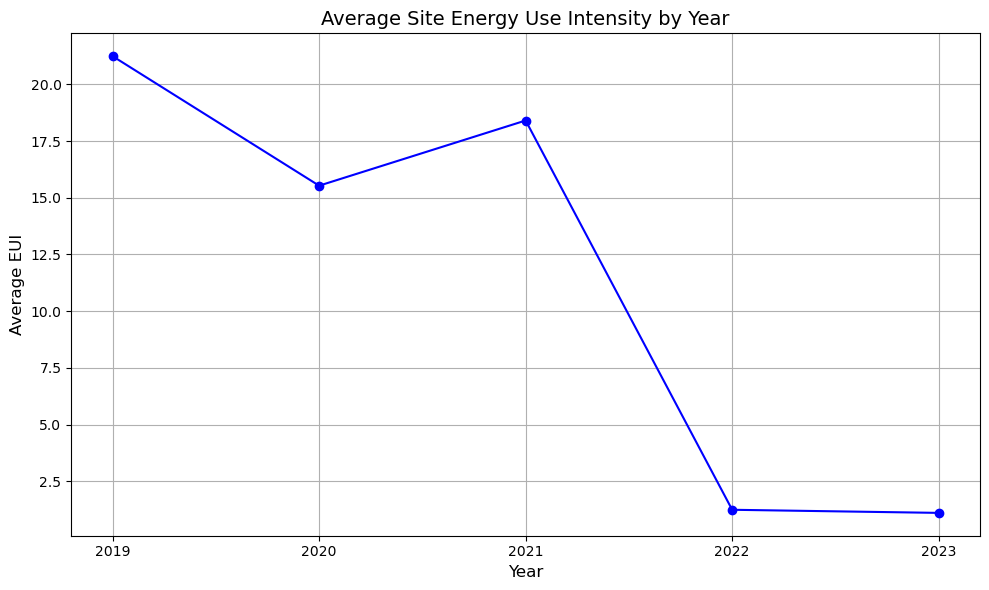

In [618]:
# Plotting the line graph
avg_EUI_by_year = extracted_df.groupby('Year Ending')['Energy Use Intensity (EUI)'].mean()
plt.figure(figsize=(10, 6))
plt.plot(avg_EUI_by_year, marker='o', linestyle='-', color='b')

plt.title('Average Site Energy Use Intensity by Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average EUI', fontsize=12)
plt.xticks(avg_EUI_by_year.index.astype(int))
plt.grid(True)
plt.tight_layout()
plt.show()

In [325]:
# From the graph above, average energy usage intensity peaked in 2019 with a value hitting more than 20.
# It dropped to its lowest in 2022 and 2023 with average EUI less than 2.5 

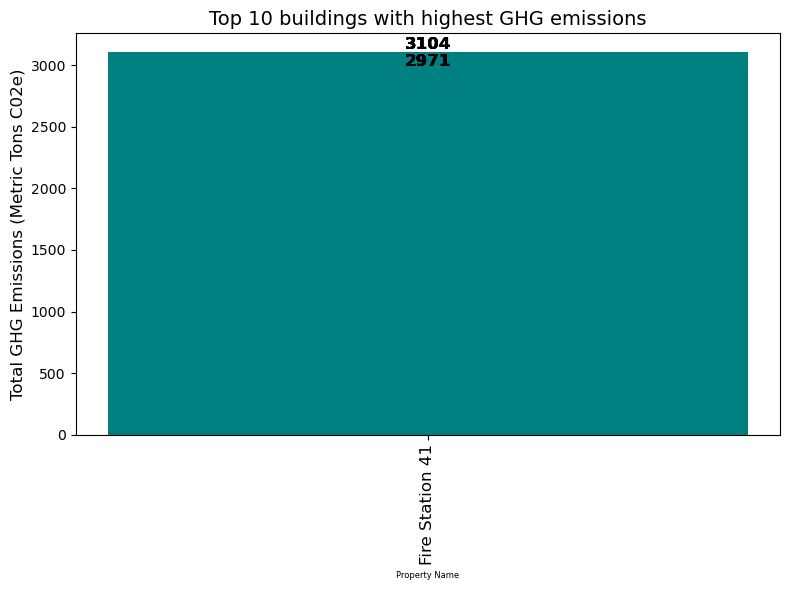

In [743]:
# Bar Plot
# Merging Total GHG from extracted_data with merged_data on property id
bar_merged_data = pd.merge(cleaned_Building_Efilled, extracted_df[['Property Id', 'Total GHG Emissions (Metric Tons CO2e)']], on='Property Id')
# Sorting values, using 'Total GHG Emissions (Metric Tons CO2e)_y' because its numerical
top_10_buildings = bar_merged_data.sort_values(by= 'Total GHG Emissions (Metric Tons CO2e)_y', ascending=False).head(10)
plt.figure(figsize=(8, 6))
bars = plt.bar(top_10_buildings['Clean Property Name'], top_10_buildings['Total GHG Emissions (Metric Tons CO2e)_y'], color='teal')


# Annotate each bar with each value
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height ,
             f'{height:.0f}', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title('Top 10 buildings with highest GHG emissions', fontsize=14)
plt.xlabel('Property Name', fontsize=6)
plt.ylabel('Total GHG Emissions (Metric Tons C02e)', fontsize=12)
plt.xticks(rotation=90, ha='center', fontsize=12)
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.2, top=0.9)
plt.tight_layout()
plt.show()


In [596]:
display(bar_merged_data.columns)

Index(['Property Id', 'Property Name', 'Address 1', 'City', 'Postal Code',
       'Province', 'Primary Property Type - Self Selected',
       'Number of Buildings', 'Year Built',
       'Property GFA - Self-Reported (m²)', 'Site Energy Use (GJ)',
       'Weather Normalized Site Energy Use (GJ)', 'Site EUI (GJ/m²)',
       'Weather Normalized Site EUI (GJ/m²)', 'Source Energy Use (GJ)',
       'Weather Normalized Source Energy Use (GJ)', 'Source EUI (GJ/m²)',
       'Weather Normalized Source EUI (GJ/m²)',
       'Total GHG Emissions (Metric Tons CO2e)_x',
       'Total GHG Emissions Intensity (kgCO2e/m²)',
       'Direct GHG Emissions (Metric Tons CO2e)',
       'Direct GHG Emissions Intensity (kgCO2e/m²)',
       'Electricity Use - Grid Purchase (kWh)', 'Natural Gas Use (GJ)',
       'Year Ending', 'Unique ID', 'StandardizedPostal', 'Clean Address',
       'Clean Property Name', 'Total GHG Emissions (Metric Tons CO2e)_y'],
      dtype='object')

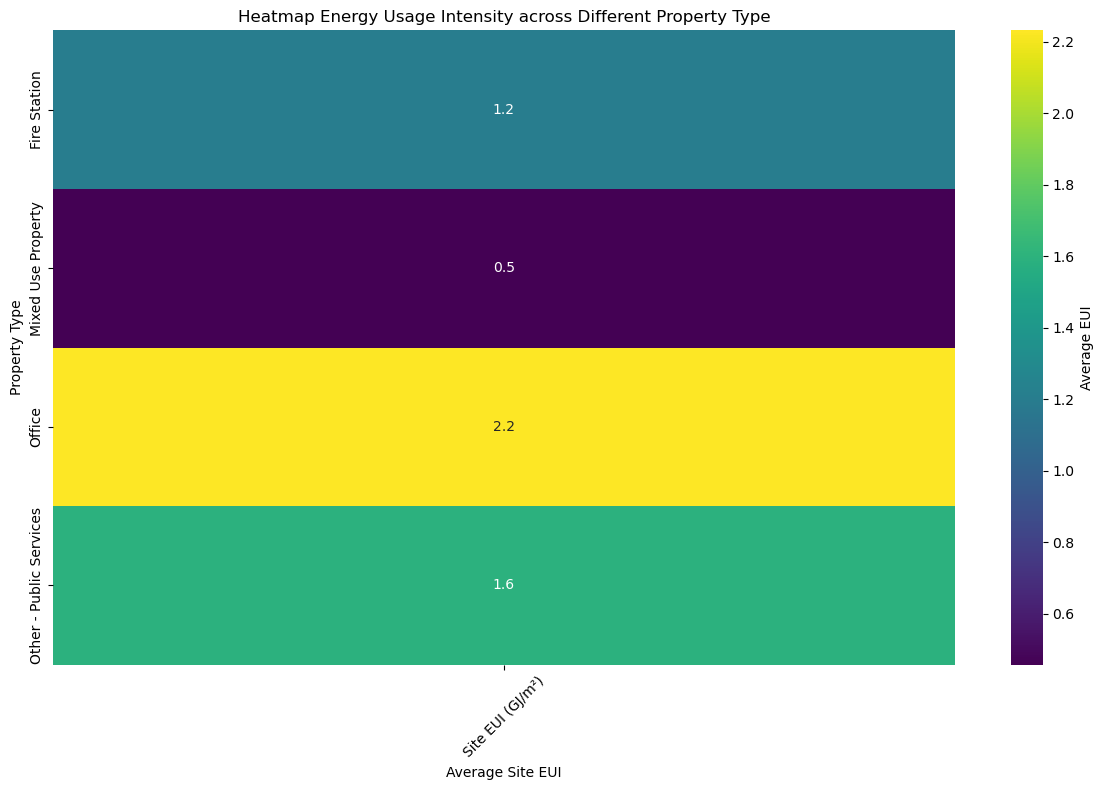

In [514]:
# Plotting heatmap
import seaborn as sns
heatmap_eui = bar_merged_data.groupby('Primary Property Type - Self Selected')['Site EUI (GJ/m²)'].mean().reset_index()
heatmap_eui = heatmap_eui.pivot_table(values='Site EUI (GJ/m²)', index='Primary Property Type - Self Selected')
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_eui, annot=True, cmap='viridis', cbar_kws={'label' : 'Average EUI'}, fmt='.1f')
plt.title('Heatmap Energy Usage Intensity across Different Property Type')
plt.xlabel('Average Site EUI')
plt.ylabel('Property Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Correlation between relevant columns:                                         Site EUI (GJ/m²)  \
Site EUI (GJ/m²)                                1.000000   
Total GHG Emissions (Metric Tons CO2e)          0.371782   
Property GFA - Self-Reported (m²)              -0.200398   

                                        Total GHG Emissions (Metric Tons CO2e)  \
Site EUI (GJ/m²)                                                      0.371782   
Total GHG Emissions (Metric Tons CO2e)                                1.000000   
Property GFA - Self-Reported (m²)                                     0.551354   

                                        Property GFA - Self-Reported (m²)  
Site EUI (GJ/m²)                                                -0.200398  
Total GHG Emissions (Metric Tons CO2e)                           0.551354  
Property GFA - Self-Reported (m²)                                1.000000  


Text(0.5, 1.0, 'Correlation matrix: Energy, Emissions and Building Size')

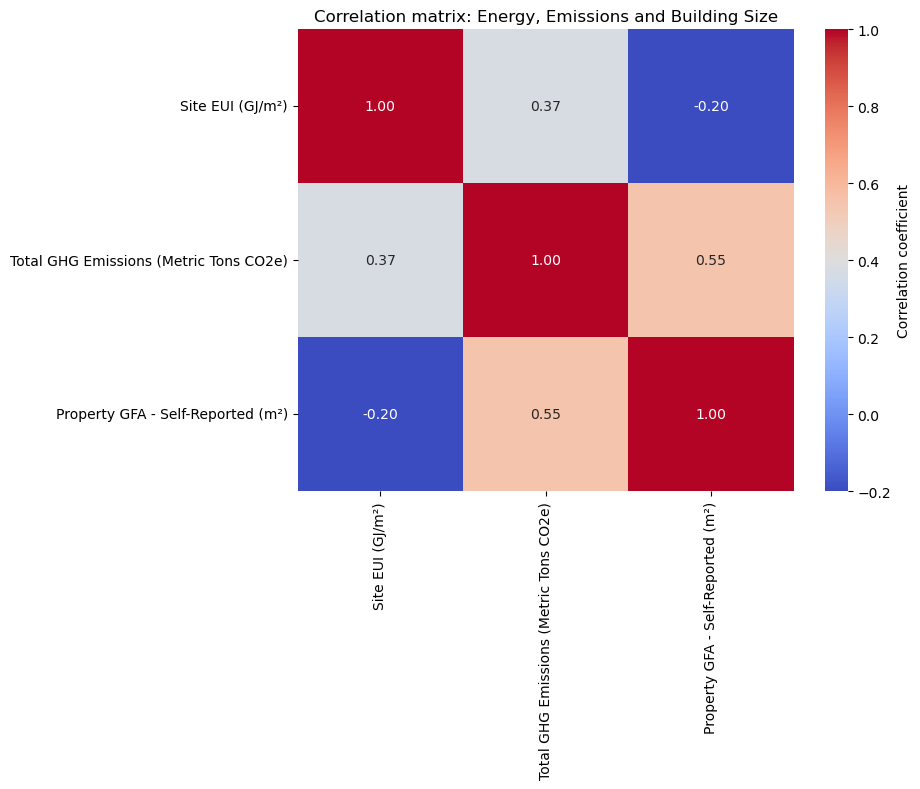

In [652]:
# Calculating the correlation  matrix and visulaizing energy consumption, emissions and building size
#Calculating 'Site EUI (GJ/m²)' for extracted_df data
extracted_df['Site EUI (GJ/m²)'] = extracted_df['Site Energy Use (GJ)'] / extracted_df['Property GFA - Self-Reported (m²)']
#Selecting relevant columns
correlation_data = extracted_df[['Site EUI (GJ/m²)', 'Total GHG Emissions (Metric Tons CO2e)', 'Property GFA - Self-Reported (m²)']]
#Calculating correlation matrix
correlation_matrix = correlation_data.corr()
print(f"Correlation between relevant columns:", correlation_matrix)

# Visualize
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar_kws={'label' : 'Correlation coefficient'}, fmt='.2f')
plt.title('Correlation matrix: Energy, Emissions and Building Size')

In [654]:
# 1.The correlation between Total GHG Emissions (Metric Tons CO2e) and Property GFA - Self-Reported (m^2) shown in the graph is the strongest
# with a correlation coefficinet of 0.55. This suggests a moderate positive correlation, which could mean larger builds tend to have higher
# GHG emmisions.
# 2. Site EUI (GJ/m^2) and Total GHG Emissions (Metric Tons CO2e) has a weak to moderate positive correlation, with a correlation coefficient
# 0.37. This also suggests that buildings with higher Site Energy Use Intensity have higher GHG emmisions. Implying that buildings with higher 
# energy use are more likely to emite more GHGS
# 3. Lastly, Site EUI (GJ/m^2) and Property GFA - Self-Reported (m^2) have a negative correlation, their correlation coefficient is -0.20.
# This means that larger buildings have a slightly lower energy intensity as compared to smaller buildings.

In [656]:
#Recommendations: Measures have to be put for larger buildings, to minimize their electricity consumption

In [739]:
# Using the original dataset to have access to Energy Star Score for hypothesis testing
from scipy import stats
office_data = Building_Energy[Building_Energy['Primary Property Type - Self Selected'] == 'Office']['ENERGY STAR Score'].dropna()
ice_data = Building_Energy[Building_Energy['Primary Property Type - Self Selected'] == 'Ice/Curling Rink']['ENERGY STAR Score'].dropna()

#Conducting t-test
t_stat, p_value = stats.ttest_ind(office_data, ice_data)
print(f't-statistic: {t_stat}')
print(f'p-statistic: {p_value}')

if p_value < 0.05:
    print("There is a statistically significant difference between the Energy Star Scores of office and ice/curling buildings")
else:
    print("There is no statistically significant difference between the Energy Star Scores of office and ice/curling buildings")

t-statistic: 3.2423927715555587
p-statistic: 0.0014886772098221064
There is a statistically significant difference between the Energy Star Scores of office and ice/curling buildings


In [ ]:
Discussion: This suggests that the energy efficiency of office buildings is statistically different from ice/curling
buildings. This could be because of difference in usgae patterns, building design or energy-saving features.